In [108]:
import pandas as pd
from datetime import datetime

In [203]:
df = pd.read_csv('../../tennis-prediction/gp_laplace_2016_start_matern12plus32.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] < datetime(2018, 12, 31)]

df.shape

(2548, 15)

In [204]:
import numpy as np

np.mean(df['winner_prob'] > 0.5)

0.6385400313971743

In [205]:
from tpr.evaluation.evaluator import Evaluator

In [206]:
Evaluator.logloss(np.ones(df.shape[0]), df['winner_prob'].values)

0.6300324142642314

In [187]:
by_tournament = df.groupby('tournament_name').apply(lambda x: Evaluator.logloss(np.ones(x.shape[0]), x['winner_prob'])).sort_values()

In [188]:
df_2 = pd.read_csv('../../tennis-prediction/gp_laplace_2017_start.csv')
df_2['date'] = pd.to_datetime(df_2['date'])
df_2 = df_2[df_2['date'].dt.year == 2018]

In [189]:
by_tournament_2 = df_2.groupby('tournament_name').apply(lambda x: Evaluator.logloss(np.ones(x.shape[0]), x['winner_prob'])).sort_values()

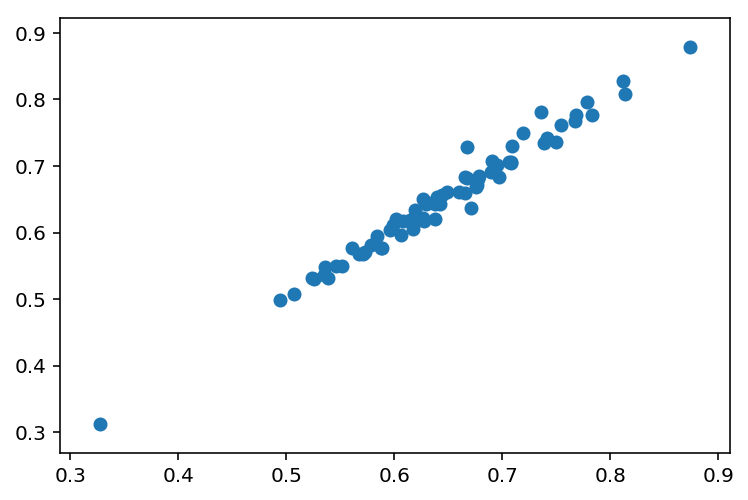

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(by_tournament.values, by_tournament_2.loc[by_tournament.index].values)

In [191]:
(by_tournament - by_tournament_2).sort_values()

tournament_name
Maharashtra Open - Pune                        -0.060533
Hall of Fame Open - Newport                    -0.045771
Mubadala World Tennis Championship             -0.030840
Barcelona Open BancSabadell - Barcelona        -0.023639
Chengdu Open - Chengdu                         -0.021065
Swiss Indoors Basel - Basel                    -0.019289
TEB BNP Paribas Istanbul Open - Istanbul       -0.018304
New York Open - New York                       -0.017170
Argentina Open - Buenos Aires                  -0.016665
Miami Open - Miami                             -0.016105
Gazprom Hungarian Open - Budapest              -0.015793
Open Parc - Lyon                               -0.015245
Erste Bank Open - Vienna                       -0.014792
China Open - Beijing                           -0.013896
Dubai Duty Free Tennis Championships - Dubai   -0.013235
Rakuten Japan Open - Tokyo                     -0.012436
Shanghai Rolex Masters - Shanghai              -0.012356
Rogers Cup - To

In [192]:
# How did it go on the AO?
df = pd.read_csv('../../tennis-prediction/gp_laplace_2016_start_matern12plus32.csv')
df['date'] = pd.to_datetime(df['date'])

df = df[df['date'].dt.year == 2019]
df = df[df['tournament_name'].str.contains('Australian Open')]

In [193]:
df.shape

(120, 15)

In [194]:
Evaluator.logloss(np.ones(df.shape[0]), df['winner_prob'])

0.5262352243982623